Build a regression model.

In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

Provide model output and an interpretation of the results. 

In [3]:
bike_poi = pd.read_csv('join_data_original.csv')

In [4]:
# drop categorical variables and keep numerical variables only
join_data = bike_poi.drop(columns = ['longitude', 'latitude','f_longitude','f_latitude','break_fast_True','brunch_False','brunch_True','lunch_True','dinner_False','dinner_True', 'happy_hour_False','happy_hour_True'])

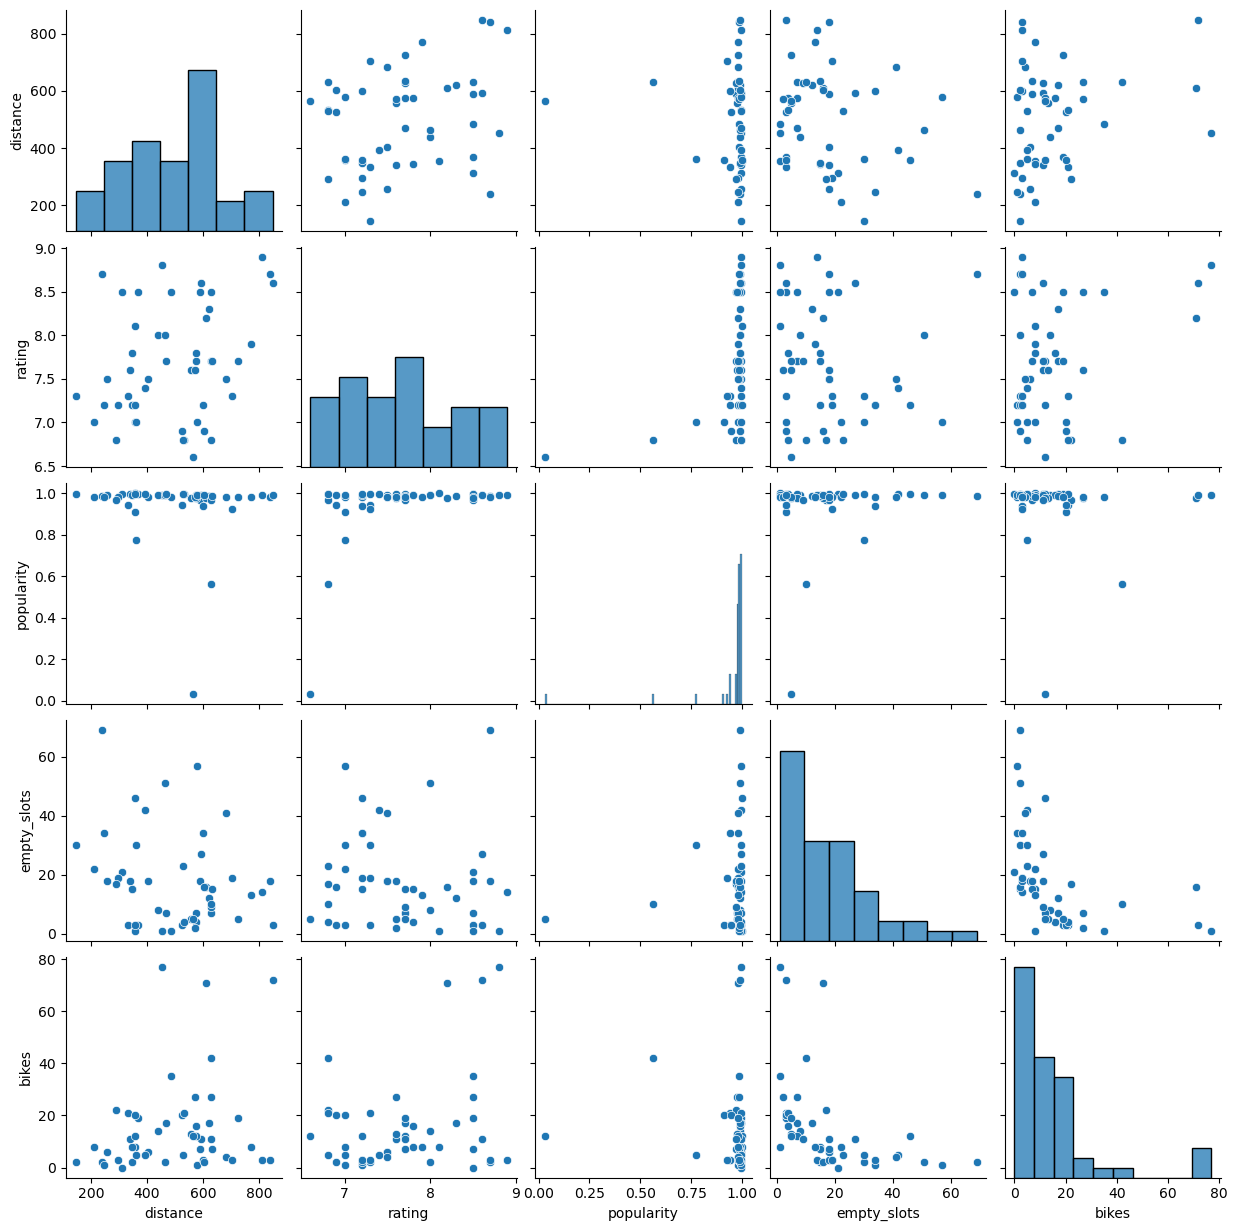

In [5]:
#pairplot to take a look the data again
sns.pairplot(data=join_data)
plt.show()

In [6]:
# check corellations one more time
join_data.corr()

,distance,rating,popularity,empty_slots,bikes
distance,1.000000,0.276580,-0.087390,-0.244986,0.238783
rating,0.276580,1.000000,0.360671,-0.079130,0.274036
popularity,-0.087390,0.360671,1.000000,0.132586,-0.053297
empty_slots,-0.244986,-0.079130,0.132586,1.000000,-0.451012
bikes,0.238783,0.274036,-0.053297,-0.451012,1.000000


#### Simple Linear Regression


In [7]:
y = join_data['bikes']
X = join_data['distance']
X = sm.add_constant(X)
X.head()

,const,distance
0,1.0,146
1,1.0,239
2,1.0,312
3,1.0,258
4,1.0,211


In [18]:
model = sm.OLS(y, X) #instantiat
distance_bike_result = model.fit()
print(distance_bike_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  bikes   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.902
Date:                Sun, 29 Jan 2023   Prob (F-statistic):             0.0949
Time:                        22:59:02   Log-Likelihood:                -212.12
No. Observations:                  50   AIC:                             428.2
Df Residuals:                      48   BIC:                             432.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7837      7.494      0.371      0.7

#### Important Output:

- **R-squared**: R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit. In this out put, we can see that the value is 0.057. This means that the model is capable of explaining 5.7% of the patterns in the data
- **P>|t|**: A p-value of higher than 0.05 which means the distance does not have an impact the number of bikes
- **coef**: Coef is short for the coefficient of the independent variable. It represents the impact on the response variable per unit increase of the independent variable. In this case, we can see that the coef of rating is 0.0243. This means that a unit increase in the value of rating will have a positive impact on the number of bikes

1. Residual plots

In [20]:
residuals = distance_bike_result.resid
residuals

0     -4.338538
1     -6.602941
2    -10.380377
3     -3.065562
4      0.078815
5     -7.773380
6      7.231763
7     -3.451707
8     -3.183875
9     -6.990802
10    -0.086481
11    10.132655
12    63.210844
13    12.155289
14    -9.232571
15     0.503025
16     0.475247
17    -6.571735
18    20.431694
19    -7.328251
20   -12.056989
21     8.475247
22    -6.549101
23     2.796921
24    -6.246633
25   -10.124891
26    -0.808361
27     8.876824
28    -0.879692
29    53.339444
30    -3.345741
31    -4.759664
32    10.264684
33    -7.050131
34   -11.196221
35     4.433409
36     5.238621
37   -10.688333
38   -15.881406
39   -14.417072
40   -15.413643
41   -19.554590
42   -15.490117
43    -4.516180
44    -1.436277
45   -13.531956
46   -20.211997
47   -16.924960
48    23.876824
49    48.568867
dtype: float64

2. Normality

Check the normality assumption by checking normality on the residuals

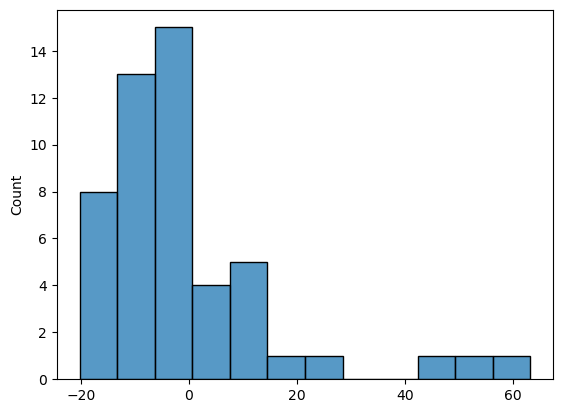

In [12]:
sns.histplot(residuals)
plt.show()

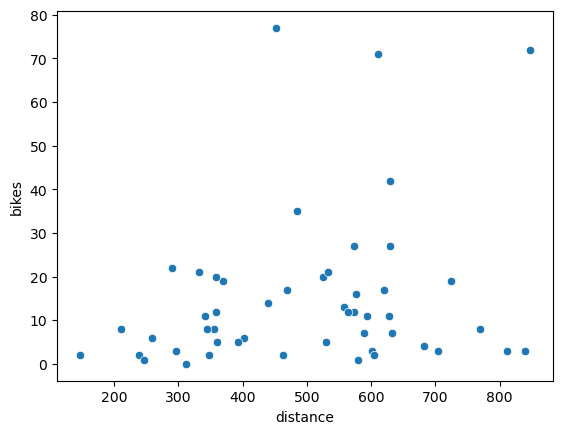

In [13]:
sns.scatterplot(data = join_data, x='distance', y='bikes')
plt.show()

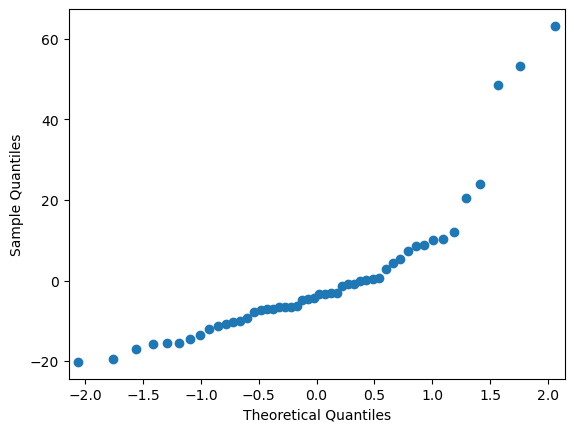

In [14]:
sm.qqplot(residuals)
plt.show()

In [15]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.7797031998634338, pvalue=3.0808749329480634e-07)

Normality assumption seems to be violated. It seems it was likely due to outliers

3. Homoscedasticity

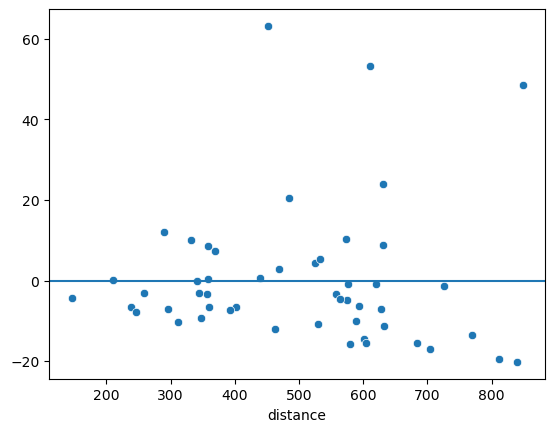

In [16]:
ax = sns.scatterplot(x=join_data['distance'], y=residuals)
ax.axhline(0)

In [21]:
# Use the Breusch-Pagan test to formally test homoscedasticity
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals,distance_bike_result.model.exog)
print(p,f_p)

0.10304366950958657 0.10721806040923909


Homoscedascity assumption is satisfied

# Stretch

How can you turn the regression model into a classification model?